# Extracting a Box Subset
#### This notebook will demonstrate how to extract a box subset from a full data set and then display the air quality within this box.

## Setup

In [1]:
import os
import warnings

import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt

import cap_sample_data
from clean_air.data import DataSubset

warnings.filterwarnings("ignore", message=".*\*approx\* keyword argument")

ERROR 1: PROJ: proj_create_from_database: Open of /home/h04/twilson/.conda/envs/cap_env/share/proj failed


In [2]:
SAMPLEDIR = cap_sample_data.path

## Extracting a box
#### Now that you have your libraries set up and your data ready to retrieve (which in this case is from our cap-sample-data repository, but you can of course choose your own), you can extract a cube from within the data.

#### Note that the numerical values defining the limits of your box represent coordinate values in metres.  You have the option to change the coordinate reference system using the extra parameter 'crs', in which case your coordinates will be accepted in your chosen CRS and converted for the map.

In [4]:
ds = DataSubset(os.path.join(SAMPLEDIR, "model_full", "aqum_daily*")
)
cube = ds.extract_box((-1000, -2000, 3000, 4000), crs=None)

# Viewing the data

#### You can view the properties and attributes of your data subset by calling the variable defining it, as shown below.

In [5]:
cube

<iris 'Cube' of daily_air_quality_index / (1) (time: 2; projection_y_coordinate: 4; projection_x_coordinate: 2)>

#### You can now use one of Iris' plotting modes and a distribution mode (in this case MEAN) to display the data graphically.  For more options regarding these values, take a look at Iris' help pages: 

https://scitools-iris.readthedocs.io/en/latest/generated/api/iris/quickplot.html?highlight=quickplot#module-iris.quickplot

https://scitools-iris.readthedocs.io/en/latest/generated/api/iris/analysis.html?highlight=analysis#module-iris.analysis


/home/h04/twilson/.conda/envs/cap_env/lib/python3.8/site-packages/iris/coords.py:1979: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_reference_time'.
  warnings.warn(msg.format(self.name()))
/home/h04/twilson/.conda/envs/cap_env/lib/python3.8/site-packages/iris/coords.py:1803: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h04/twilson/.conda/envs/cap_env/lib/python3.8/site-packages/iris/coords.py:1803: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  warnings.warn(


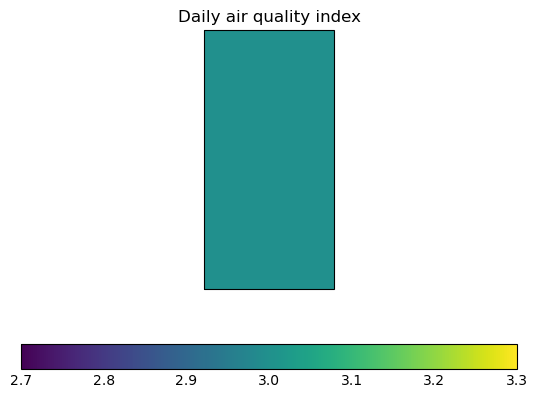

In [6]:
qplt.pcolormesh(cube.collapsed("time", iris.analysis.MEAN))